In [1]:
# Change here using YOUR own first and last names
fn1 = "quentin"
ln1 = "ravaux"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_ravaux_quentin.ipynb


In [2]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
import matplotlib.pyplot as plt
import numpy.linalg
import math
from scipy.stats import norm
from seaborn import pairplot

## 1) Preprocess the data

In [3]:
#Set the random seed to 0.
random.seed(0)

#Load the data. 
df = pd.read_csv('data_dm3.csv',header=None)

#Print the mean, and standard deviation of every covariate.
mean = df.mean(axis=0)
print("Mean :",'\n')
print(mean,'\n')

standart_deviation = df.std(axis=0)
print("Standart deviation :",'\n')
print(standart_deviation)

Mean : 

0      2.411344e-17
1     -2.310871e-17
2      1.210382e-17
3     -1.054963e-17
4      1.632681e-17
           ...     
206    1.858744e-17
207   -2.511817e-19
208   -1.306145e-17
209    8.037814e-18
210    1.521335e+02
Length: 211, dtype: float64 

Standart deviation : 

0       1.001133
1       1.001133
2       1.001133
3       1.001133
4       1.001133
         ...    
206     1.001133
207     1.001133
208     1.001133
209     1.001133
210    77.093005
Length: 211, dtype: float64


Is the data centered?
Normalized? Standardized?

The mean of the covariate is 0 and the standart deviation is equal to 1 so the data is centered, normalized and standardized.

In [4]:
#Separate the data frame in two matrices, X and Y , containing the input and output data respectively.
data = df.to_numpy()
p = len(data[0]) - 1
n = len(data[:,0])
X = data[:,:p]
Y = data[:,p]

# Separate the covariate data in train and test sets. Save one fourth of the data as testing.
X_test = X[(3*n)//4:]
X_train = X[:(3*n)//4]

Y_test = Y[(3*n)//4:]
Y_train = Y[:(3*n)//4]

#Center and standardize the train and test data and plot its mean and variance again.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('mean of train set : \n' ,np.mean(X_train,axis=0)[:10], '...','\n\n' , 'mean of test set : \n', np.mean(X_test,axis=0)[:10] , '... \n\n')
print('standart deviation of train set : \n' ,np.std(X_train,axis=0)[:10], '...','\n\n' , 'standart deviation of test set : \n', np.std(X_test,axis=0)[:10] , '...')

#Create two empty dataFrames of names df_test and df_coef.
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

mean of train set : 
 [-1.07332740e-17  1.07332740e-17 -5.36663698e-18 -3.21998219e-17
  5.36663698e-18  1.60999109e-17  0.00000000e+00 -1.60999109e-17
  9.39161471e-18  4.02497773e-18] ... 

 mean of test set : 
 [-0.03443908 -0.02803067  0.33123621  0.11710277  0.02695242 -0.04348408
 -0.01284738 -0.1091484  -0.30146989  0.11095224] ... 


standart deviation of train set : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] ... 

 standart deviation of test set : 
 [1.01587713 0.96583875 1.02001205 0.87289372 1.04536408 0.98743781
 0.80894282 0.9337211  0.94099763 0.95271056] ...


The train set is well standardized but the test set is not well standardized because we use the standardization of the train set on the test set.

## 2) Determination coefficient and Mean squared

In [5]:
def determination_coefficient(Y,Y_predicted) :
    return(1-((np.sum((Y - Y_predicted)**2))/(np.sum((Y-(1/len(Y))*(np.sum(Y)))**2))))

def mean_squared(Y,Y_predicted) :
    return((1/len(Y))* np.sum((Y - Y_predicted)**2))

    

## 3) OLS

In [6]:
#apply the linear regression of the sklearn library to the train data
reg = sklearn.linear_model.LinearRegression().fit(X_train,Y_train)

#print the determination coefficient and the MSE of the test data
Y_predicted = reg.predict(X_test)
print("determination coefficient : ",determination_coefficient(Y_test,Y_predicted))
print("verification of determination coefficient : ", reg.score(X_test,Y_test))
print("mean_squared : ",mean_squared(Y_test,Y_predicted))

#add a column named OLS to the df_test dataframe that contains the predicted values for the sample
df_test['OLS'] = reg.predict(X_test)

#add a column named OLS to the df_coef dataframe that contains the estimated coefficients
df_coef['OLS'] = reg.coef_

determination coefficient :  0.355223944944027
verification of determination coefficient :  0.355223944944027
mean_squared :  3957.2306943363046


## 4) Covariance

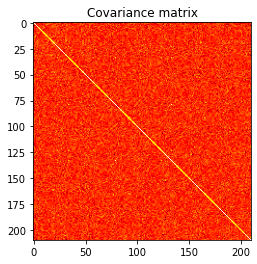

In [7]:
n = np.shape(X_train)[0]
cov_matrix = (1/(n-1)) * np.dot(X_train.transpose(),X_train)
plt.imshow(cov_matrix, cmap='hot')
plt.title('Covariance matrix')
plt.show()
U,s,V = numpy.linalg.svd(cov_matrix)

## 5)

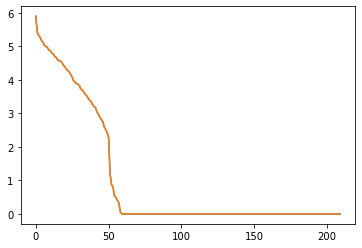

In [8]:
U_X,s_X,V_X = numpy.linalg.svd(X_train)

res = [(1/(n-1))*(s_X[i]**2) for i in range(p)]
plt.plot(res)
plt.plot(s)
plt.show()

The two sides of the equation are fiting perfectly

# 6) Principal Components

The variance explained by each component is the variance of the data projected on this component.

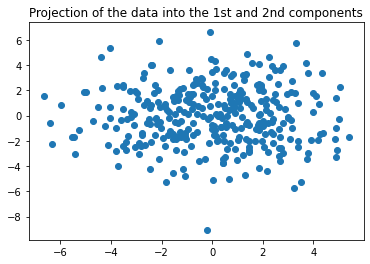

In [9]:
#Compute the projection
X_proj = np.dot(X_train,U)

#Plot the projection of the data into the 1st and 2nd components
plt.figure()
plt.scatter(X_proj[:,0],X_proj[:,1])
plt.title('Projection of the data into the 1st and 2nd components')
plt.show()

# 7) Loadings

The angle between the loadings shows how much those directions are correlated, if the angle is 90° the directions are uncorrelated.

Text(0.5, 1.0, 'First and second loadings')

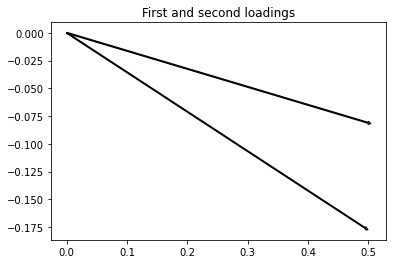

In [10]:
X_load = np.dot(U,np.diag(np.sqrt(s_X)))

v1 = X_load[0]
v2 = X_load[1]

u1 = U[:,0]
e1 = u1 / numpy.linalg.norm(u1)

u2 = U[:,1]
e2 = u2 / numpy.linalg.norm(u2)

plt.arrow(0,0,np.dot(v1,e1),np.dot(v1,e2))
plt.arrow(0,0,np.dot(v2,e1),np.dot(v2,e2))
plt.title('First and second loadings')

# 8) PCA

In [11]:
X_train_projected = np.dot(X_train, U[:,:60])
X_test_projected = np.dot(X_test, U[:,:60])

#apply the linear regression of the sklearn library to the train data
reg_pca = sklearn.linear_model.LinearRegression().fit(X_train_projected,Y_train)

#print the determination coefficient and the MSE of the test data
Y_predicted_pca = reg_pca.predict(X_test_projected)
print("determination coefficient : ",determination_coefficient(Y_test,Y_predicted_pca))
print("verification of determination coefficient : ", reg_pca.score(X_test_projected,Y_test))
print("mean_squared : ",mean_squared(Y_test,Y_predicted_pca))

#add a column named pca_ols to the df_test dataframe that contains the predicted values for the sample
df_test['pca_ols'] = reg_pca.predict(X_test_projected)


determination coefficient :  0.41235388387656113
verification of determination coefficient :  0.41235388387656113
mean_squared :  3606.602990133243


# 9) Lasso

In [12]:
#apply the LassoCV of the sklearn library: it uses cross-validation internally for different values 
#of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
#log scale beteween 1e  ́ 3 and 1e1 (see function np.logspace)

alphas = np.logspace(1e-3,1e1,30)

reg_lasso = sklearn.linear_model.LassoCV(alphas = alphas, n_alphas = 30).fit(X_train, Y_train)

#print the determination coefficient and the MSE of the test data

Y_predicted_lasso = reg_lasso.predict(X_test)
print("determination coefficient : ",determination_coefficient(Y_test,Y_predicted_lasso))
print("verification of determination coefficient : ", reg_lasso.score(X_test,Y_test))
print("mean_squared : ",mean_squared(Y_test,Y_predicted_lasso))

#print the regulatization parameter that the algorithm selects
print("\n chosen regulatization parameter : ", reg_lasso.alpha_)

#add a column named lasso to the df_test dataframe that contains the predicted values for the sample
df_test['lasso'] = reg_lasso.predict(X_test)

#add a column named lasso to the df_coef dataframe that contains the estimated coefficients
df_coef['lasso'] = reg_lasso.coef_

determination coefficient :  0.48835794158625034
verification of determination coefficient :  0.48835794158625034
mean_squared :  3140.1377923262608

 chosen regulatization parameter :  4.904403649126098


# 10) Ridge

In [13]:
#apply the RidgeCV of the sklearn library: it uses crossvalidation internally for different values
#of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
#log scale beteween 1e  ́ 1 and 10e2 (see function np.logspace)

alphas = np.logspace(1e-1,1e2,30)
reg_ridge = sklearn.linear_model.RidgeCV(alphas = alphas).fit(X_train, Y_train)

#print the determination coefficient and the MSE of the test data

Y_predicted_ridge = reg_ridge.predict(X_test)
print("determination coefficient : ",determination_coefficient(Y_test,Y_predicted_ridge))
print("verification of determination coefficient : ", reg_ridge.score(X_test,Y_test))
print("mean_squared : ",mean_squared(Y_test,Y_predicted_ridge))

#print the regulatization parameter that the algorithm selects
print("\n chosen regulatization parameter : ", reg_ridge.alpha_)

#add a column named ridge to the df_test dataframe that contains the predicted values for the sample
df_test['ridge'] = reg_ridge.predict(X_test)

#add a column named ridge to the df_coef dataframe that contains the estimated coefficients
df_coef['ridge'] = reg_ridge.coef_

determination coefficient :  0.4107030898913846
verification of determination coefficient :  0.4107030898913846
mean_squared :  3616.7345273963615

 chosen regulatization parameter :  1.2589254117941673


# 11)

In [14]:

n = np.shape(X_train)[0]
p = np.shape(X_train)[1]
gram = (1/n) * np.dot(X_train.transpose(), X_train)

def test_computation(k,r) :
    reg = sklearn.linear_model.LinearRegression().fit(X_train[:,k:k+1],r)
    theta = np.abs(reg.coef_[0])
    s = np.sqrt(1/(np.dot(X_train[:,k:k+1].transpose(),X_train[:,k:k+1])))
    sigma = (1/(n-2)) * (numpy.linalg.norm(r - theta * X_train[:,k]))**2
    return(n*theta/(s*sigma),theta)


coeff_list = []
r = np.copy(Y_train)
for i in range(p) :
    max_cov = 0
    max_val = (-math.inf,0)
    for k in range(p):
        val = test_computation(k,r)
        if k not in coeff_list and val[0] > max_val[0] :
            max_cov = k
            max_val = val
    coeff_list.append(max_cov)
    r = r - max_val[1] * X_train[:,k]
print("First method with the statistical test : ")
print(coeff_list,'\n\n')

coeff_list2 = []
r = np.copy(Y_train)
r_test = np.copy(Y_test)
for i in range(p) :
    max_cov = 0
    max_reg = sklearn.linear_model.LinearRegression().fit(X_train[:,0:1],r)
    max_val = -math.inf
    for k in range(p):
        reg = sklearn.linear_model.LinearRegression().fit(X_train[:,k:k+1],r)
        val = reg.score(X_test[:,k:k+1],r_test)
        if k not in coeff_list2 and val > max_val :
            max_cov = k
            max_val = val
            max_reg = reg
    coeff_list2.append(max_cov)
    r = r - max_reg.coef_[0] * X_train[:,k]
    r_test = r_test - max_reg.coef_[0] * X_test[:,k]
print("Second method with the determination coefficient : ")
print(coeff_list2)      
        




First method with the statistical test : 
[123, 58, 209, 32, 3, 143, 28, 110, 12, 207, 105, 54, 66, 165, 21, 106, 175, 25, 88, 100, 114, 150, 142, 183, 38, 119, 24, 197, 89, 128, 86, 8, 190, 127, 107, 171, 179, 170, 166, 46, 59, 191, 5, 120, 31, 98, 145, 13, 73, 35, 140, 103, 125, 87, 63, 139, 9, 116, 205, 69, 186, 169, 206, 49, 172, 84, 17, 18, 174, 109, 16, 192, 71, 14, 44, 131, 20, 189, 90, 56, 22, 92, 102, 152, 95, 48, 196, 82, 155, 188, 111, 2, 34, 177, 173, 41, 19, 117, 1, 149, 108, 194, 164, 200, 176, 151, 162, 160, 203, 124, 77, 180, 132, 52, 204, 199, 184, 97, 51, 158, 185, 126, 167, 68, 161, 43, 74, 40, 53, 39, 7, 129, 0, 15, 154, 65, 55, 11, 157, 76, 78, 91, 134, 153, 130, 42, 121, 36, 104, 23, 163, 135, 168, 137, 62, 4, 101, 10, 115, 202, 136, 208, 138, 67, 156, 181, 64, 33, 26, 96, 81, 94, 50, 45, 198, 141, 57, 112, 79, 148, 144, 75, 147, 72, 99, 146, 30, 93, 187, 159, 113, 83, 193, 6, 178, 122, 70, 201, 47, 133, 118, 85, 61, 182, 60, 29, 195, 80, 37, 27] 


Second method 

# 12) Stop criterion:

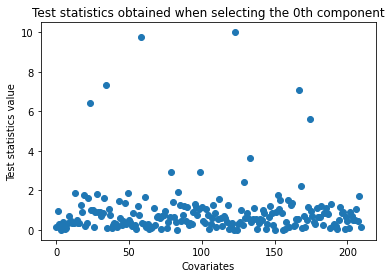

C:\Users\quent\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


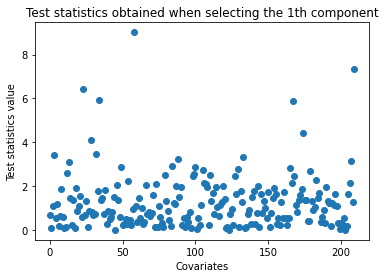

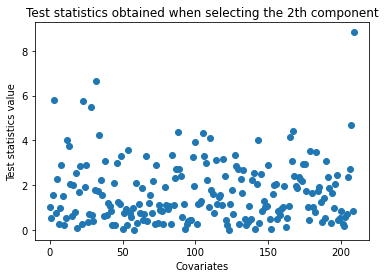

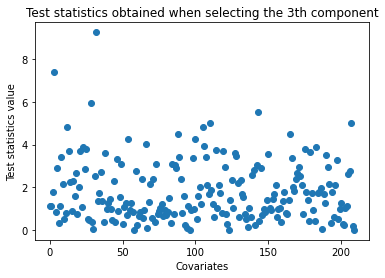

In [15]:
#llustrate the method providing
#(i) the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables (in
#abscissa: the indices of the variables; in the ordinate: the value of the test statics

m=4
test = [[] for i in range (m)]
coeff_list = []
r = np.copy(Y_train)
for i in range(m) :
    max_cov = 0
    max_val = (-math.inf,0)
    for k in range(p):
        val = test_computation(k,r)
        if k not in coeff_list :
            test[i].append(val[0])
        else :
            test[i].append(0)
        if k not in coeff_list and val[0] > max_val[0] :
            max_cov = k
            max_val = val
    coeff_list.append(max_cov)
    r = r - max_val[1] * X_train[:,k]

for j in range(m) :
    plt.figure()
    plt.scatter([i for i in range(p)],test[j])
    plt.ylabel('Test statistics value')
    plt.xlabel('Covariates')
    plt.title("Test statistics obtained when selecting the "+str(j)+"th component")
    plt.show()



selected variables :  [123, 58, 209, 32, 3, 143, 28, 110, 12]


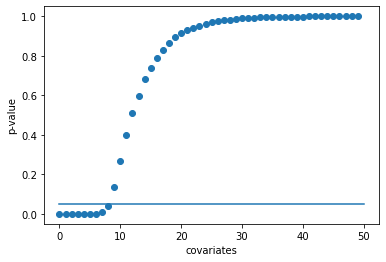

In [16]:
#Plot the graphs of
#the first 50 p-values (each associated to a selected variable)

l=50
pvalue = []
coeff_list = []
r = np.copy(Y_train)
for i in range(l) :
    max_cov = 0
    max_val = (-math.inf,0)
    for k in range(p):
        val = test_computation(k,r)
        if k not in coeff_list and val[0] > max_val[0] :
            max_cov = k
            max_val = val
    pvalue.append((2*(1-norm.cdf(max_val[0])),max_cov))
    coeff_list.append(max_cov)
    r = r - max_val[1] * X_train[:,k]
    
selected_variables = []

for j in range(l) :
    if pvalue[j][0] <= 0.05 :
        selected_variables.append(pvalue[j][1])
plt.scatter([i for i in range(l)],[pvalue[j][0] for j in range(l)])
plt.ylabel('p-value')
plt.xlabel('covariates')
plt.plot([0,l],[0.05,0.05])

print("selected variables : ", selected_variables)

In [17]:
X_train_new = X_train[:,selected_variables]
X_test_new = X_test[:,selected_variables]

#apply the linear regression of the sklearn library to the train data
reg_new = sklearn.linear_model.LinearRegression().fit(X_train_new,Y_train)

#print the determination coefficient and the MSE of the test data
Y_predicted = reg_new.predict(X_test_new)
print("determination coefficient : ",determination_coefficient(Y_test,Y_predicted))
print("verification of determination coefficient : ", reg_new.score(X_test_new,Y_test))
print("mean_squared : ",mean_squared(Y_test,Y_predicted))

#add a column named FVS to the df_test dataframe that contains the predicted values for the sample
df_test['FVS'] = reg_new.predict(X_test_new)

#add a column named FVS to the df_coef dataframe that contains the estimated coefficients

list_coef = []
cpt = 0
for i in range(p) :
    if i in selected_variables :
        list_coef.append(reg_new.coef_[cpt])
        cpt += 1 
    else :
        list_coef.append(0)       
df_coef['FVS'] = list_coef

determination coefficient :  0.4518040875362328
verification of determination coefficient :  0.4518040875362328
mean_squared :  3364.4824033097775


# 14)

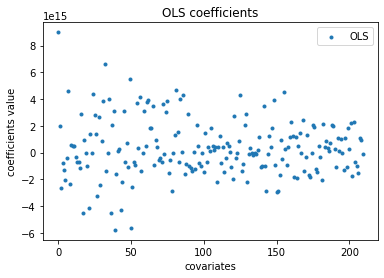

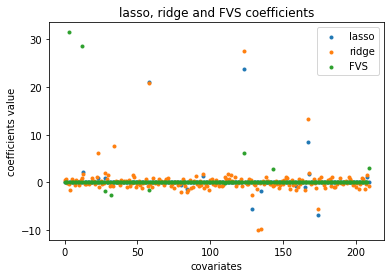

In [18]:
plt.figure()
plt.scatter([i for i in range(p)],df_coef['OLS'],marker='.',label='OLS')
plt.xlabel('covariates')
plt.ylabel('coefficients value')
plt.title('OLS coefficients')
plt.legend()

plt.figure()
plt.scatter([i for i in range(p)],df_coef['lasso'],marker='.',label='lasso')
plt.scatter([i for i in range(p)],df_coef['ridge'],marker='.',label='ridge')
plt.scatter([i for i in range(p)],df_coef['FVS'],marker='.',label='FVS')
plt.xlabel('covariates')
plt.ylabel('coefficients value')
plt.title('lasso, ridge and FVS coefficients')
plt.legend()

The OLS method have very large coefficients with widespread distribution. The lasso and ridge coefficients are closed with a few coefficients with a significant value. However ridge methods have almost of his coefficients as non zero coefficients. The choices of non zero coefficients for FVS is different.

# 15)

In [19]:
OLS = 0
lasso = 0
ridge = 0
FVS = 0

for i in range(p) :
    if df_coef['OLS'][i] == 0 :
        OLS += 1
    if df_coef['lasso'][i] == 0 :
        lasso += 1
    if df_coef['ridge'][i] == 0 :
        ridge += 1
    if df_coef['FVS'][i] == 0 :
        FVS += 1
print('number of zero coefficients in OLS : ',OLS ,'\n\n')
print('number of zero coefficients in lasso : ',lasso ,'\n\n')
print('number of zero coefficients in ridge : ',ridge ,'\n\n')
print('number of zero coefficients in FVS : ',FVS ,'\n\n')
        

number of zero coefficients in OLS :  0 


number of zero coefficients in lasso :  194 


number of zero coefficients in ridge :  0 


number of zero coefficients in FVS :  201 




The ridge method, by using the norme 2, allows to use coefficients that are closed to zero but no equal to zero because with the squared, the norme is really close to zero with impact on the prediction. The lasso method, by using the norme 1 force the coefficient that are not really correlated with the observed value to zero.

# 16)

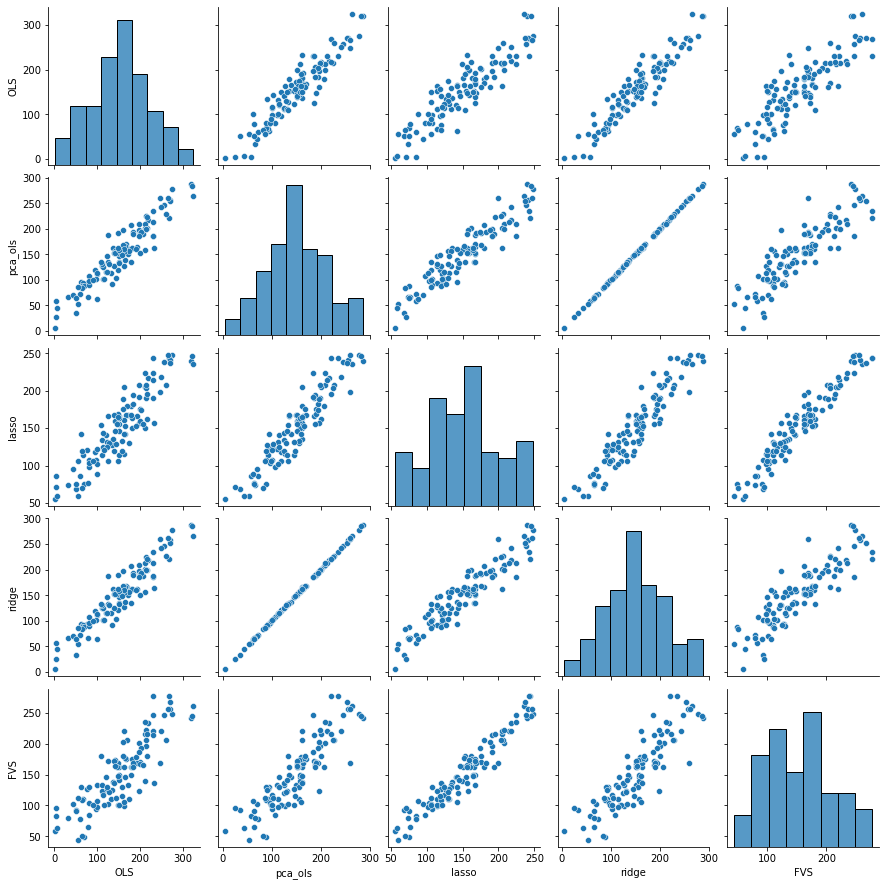

In [20]:
pairplot(df_test)

To predict the value of a new, unseen data point x we compute the scalar product between x and the choosen $\hat{\theta}$ coefficients model